<a href="https://colab.research.google.com/github/dzulfaqorali196/PCA-and-MDS/blob/main/PCA_%26_MDS_(18222017).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Informasi Dataset Iris:
Jumlah sampel: 150
Jumlah fitur: 4
Fitur: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Distribusi kelas: [50 50 50]

Statistik deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max  

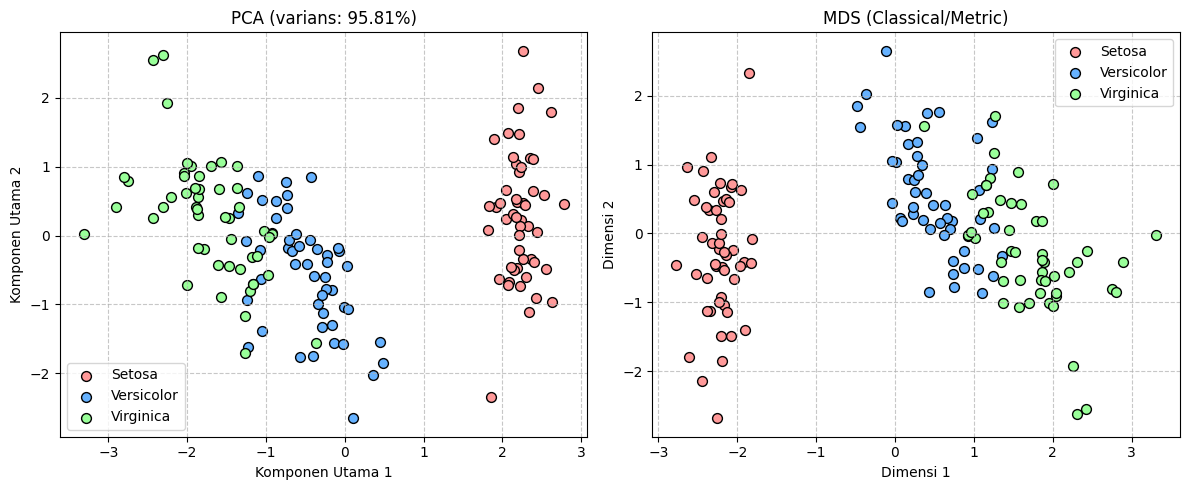


Korelasi antara dimensi PCA dan MDS:
Dimensi 1: 1.0000
Dimensi 2: 1.0000


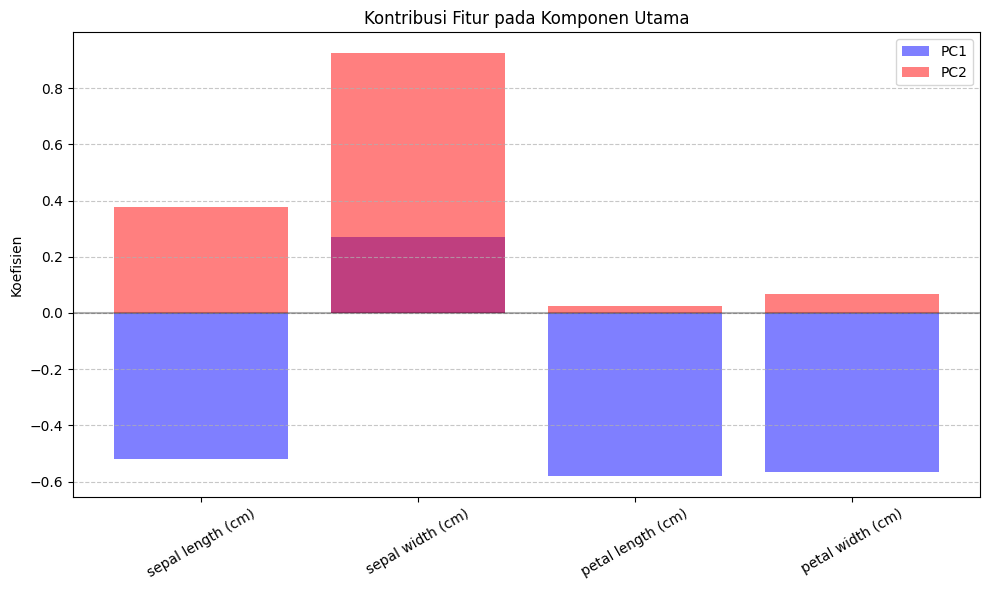

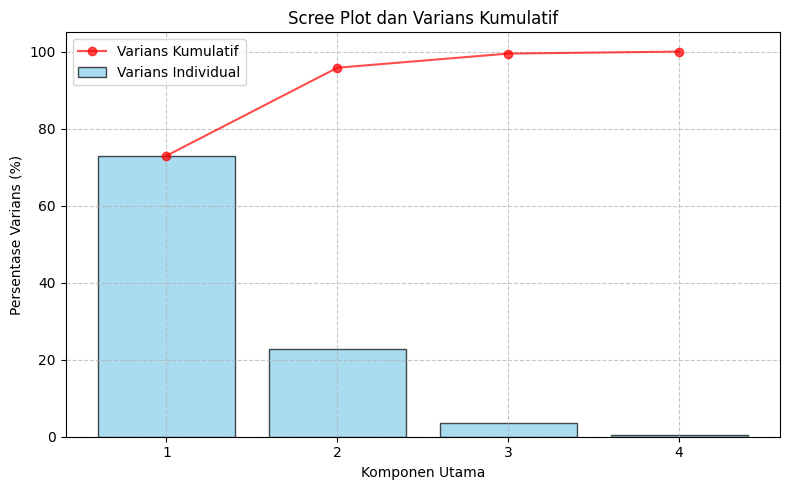

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# Fungsi implementasi manual untuk PCA
def manual_pca(X, n_components=2):
    """
    Implementasi manual algoritma PCA

    Parameters:
    X : numpy.ndarray
        Data input yang akan direduksi dimensinya
    n_components : int
        Jumlah komponen utama yang akan dipertahankan

    Returns:
    X_pca : numpy.ndarray
        Data yang telah diproyeksikan ke ruang berdimensi rendah
    eigenvalues : numpy.ndarray
        Nilai eigen dari matriks kovarians
    eigenvectors : numpy.ndarray
        Vektor eigen dari matriks kovarians
    """
    # 1. Hitung mean dari setiap fitur
    X_mean = np.mean(X, axis=0)

    # Kurangi mean dari data (centralize)
    X_centered = X - X_mean

    # 2. Hitung matriks kovarians
    n_samples = X.shape[0]
    cov_matrix = np.dot(X_centered.T, X_centered) / (n_samples - 1)

    # 3. Hitung eigenvalue dan eigenvector dari matriks kovarians
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Urutkan eigenvalue dan eigenvector berdasarkan eigenvalue secara descending
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # 4. Pilih komponen utama berdasarkan eigenvalue terbesar
    components = eigenvectors[:, :n_components]

    # 5. Proyeksikan data ke ruang berdimensi rendah
    X_pca = np.dot(X_centered, components)

    return X_pca, eigenvalues, eigenvectors

# Fungsi implementasi manual untuk MDS
def manual_mds(X, n_components=2):
    """
    Implementasi manual algoritma MDS (Classical/Metric MDS)

    Parameters:
    X : numpy.ndarray
        Data input
    n_components : int
        Jumlah dimensi output

    Returns:
    X_mds : numpy.ndarray
        Data yang telah diproyeksikan ke ruang berdimensi rendah
    """
    # 1. Hitung jarak antar pasangan data (menggunakan jarak Euclidean)
    n_samples = X.shape[0]
    distance_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            distance_matrix[i, j] = np.sqrt(np.sum((X[i] - X[j])**2))

    # 2. Bangun matriks jarak kuadrat
    D_squared = distance_matrix ** 2

    # 3. Double centering: konversi matriks jarak ke dalam inner product
    # Langkah 1: Buat matriks centering J = I - 1/n * ones(n,n)
    J = np.eye(n_samples) - np.ones((n_samples, n_samples)) / n_samples

    # Langkah 2: Aplikasikan centering ke matriks jarak kuadrat
    B = -0.5 * np.dot(np.dot(J, D_squared), J)

    # 4. Hitung eigenvalue dan eigenvector dari matriks B
    eigenvalues, eigenvectors = np.linalg.eigh(B)

    # Urutkan eigenvalue dan eigenvector berdasarkan eigenvalue secara descending
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Pilih hanya eigenvalue positif
    positive_idx = eigenvalues > 0
    eigenvalues = eigenvalues[positive_idx]
    eigenvectors = eigenvectors[:, positive_idx]

    # 5. Proyeksikan data ke ruang berdimensi rendah
    # X_mds = eigenvectors[:, :n_components] * np.sqrt(eigenvalues[:n_components])
    X_mds = np.dot(eigenvectors[:, :n_components], np.diag(np.sqrt(eigenvalues[:n_components])))

    return X_mds

# Fungsi untuk visualisasi hasil
def plot_comparison(X_pca, X_mds, y, title_pca="PCA", title_mds="MDS"):
    """
    Visualisasi hasil proyeksi PCA dan MDS

    Parameters:
    X_pca : numpy.ndarray
        Hasil proyeksi PCA
    X_mds : numpy.ndarray
        Hasil proyeksi MDS
    y : numpy.ndarray
        Label kelas
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Definisikan colors untuk setiap kelas
    colors = ['#FF9999', '#66B2FF', '#99FF99']
    cmap = ListedColormap(colors)
    class_names = ['Setosa', 'Versicolor', 'Virginica']

    # Plot PCA
    for i, label in enumerate(np.unique(y)):
        ax1.scatter(X_pca[y == label, 0], X_pca[y == label, 1], c=colors[i],
                   label=f'{class_names[i]}', edgecolors='k', s=50)

    ax1.set_title(title_pca)
    ax1.set_xlabel('Komponen Utama 1')
    ax1.set_ylabel('Komponen Utama 2')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Plot MDS
    for i, label in enumerate(np.unique(y)):
        ax2.scatter(X_mds[y == label, 0], X_mds[y == label, 1], c=colors[i],
                   label=f'{class_names[i]}', edgecolors='k', s=50)

    ax2.set_title(title_mds)
    ax2.set_xlabel('Dimensi 1')
    ax2.set_ylabel('Dimensi 2')
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.savefig('pca_mds_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Fungsi untuk menghitung persentase varians yang dijelaskan
def explained_variance(eigenvalues):
    """
    Menghitung persentase varians yang dijelaskan oleh setiap komponen

    Parameters:
    eigenvalues : numpy.ndarray
        Nilai eigen dari matriks kovarians

    Returns:
    explained_variance_ratio : numpy.ndarray
        Persentase varians yang dijelaskan oleh setiap komponen
    """
    total_variance = np.sum(eigenvalues)
    explained_variance_ratio = eigenvalues / total_variance
    return explained_variance_ratio

# Fungsi utama
def main():
    # 1. Unduh dan muat dataset Iris
    iris = load_iris()
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names

    # Buat DataFrame untuk memudahkan analisis
    df = pd.DataFrame(X, columns=feature_names)
    df['species'] = [iris.target_names[i] for i in y]

    print("Informasi Dataset Iris:")
    print(f"Jumlah sampel: {X.shape[0]}")
    print(f"Jumlah fitur: {X.shape[1]}")
    print(f"Fitur: {feature_names}")
    print(f"Distribusi kelas: {np.bincount(y)}")
    print("\nStatistik deskriptif:")
    print(df.describe())

    # 2. Lakukan preprocessing - standardisasi
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 3. Implementasikan PCA
    X_pca, eigenvalues_pca, eigenvectors_pca = manual_pca(X_scaled, n_components=2)

    # Hitung persentase varians yang dijelaskan
    variance_ratio = explained_variance(eigenvalues_pca)
    print("\nHasil Analisis PCA:")
    print(f"Nilai eigen: {eigenvalues_pca}")
    print(f"Persentase varians yang dijelaskan: {variance_ratio * 100}")
    print(f"Total varians yang dijelaskan oleh 2 komponen: {np.sum(variance_ratio[:2]) * 100:.2f}%")

    # Menampilkan koefisien komponen utama (eigenvector)
    pca_components = pd.DataFrame(
        eigenvectors_pca[:, :2],
        columns=['PC1', 'PC2'],
        index=feature_names
    )
    print("\nKoefisien Komponen Utama:")
    print(pca_components)

    # 4. Implementasikan MDS
    X_mds = manual_mds(X_scaled, n_components=2)

    # 5. Visualisasikan hasil proyeksi dari PCA dan MDS
    plot_comparison(
        X_pca, X_mds, y,
        title_pca=f"PCA (varians: {np.sum(variance_ratio[:2]) * 100:.2f}%)",
        title_mds="MDS (Classical/Metric)"
    )

    # Analisis korelasi antara hasil PCA dan MDS
    corr_dim1 = np.corrcoef(X_pca[:, 0], X_mds[:, 0])[0, 1]
    corr_dim2 = np.corrcoef(X_pca[:, 1], X_mds[:, 1])[0, 1]

    print("\nKorelasi antara dimensi PCA dan MDS:")
    print(f"Dimensi 1: {abs(corr_dim1):.4f}")
    print(f"Dimensi 2: {abs(corr_dim2):.4f}")

    # 6. Visualisasi hasil PCA berdasarkan kontribusi fitur
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, eigenvectors_pca[:, 0], color='b', alpha=0.5, label='PC1')
    plt.bar(feature_names, eigenvectors_pca[:, 1], color='r', alpha=0.5, label='PC2')
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.title("Kontribusi Fitur pada Komponen Utama")
    plt.ylabel("Koefisien")
    plt.xticks(rotation=30)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig('pca_feature_contribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 7. Visualisasi persentase varians yang dijelaskan
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(eigenvalues_pca) + 1), variance_ratio * 100, alpha=0.7, color='skyblue', edgecolor='black')
    plt.plot(range(1, len(eigenvalues_pca) + 1), np.cumsum(variance_ratio) * 100, 'ro-', alpha=0.7)
    plt.title('Scree Plot dan Varians Kumulatif')
    plt.xlabel('Komponen Utama')
    plt.ylabel('Persentase Varians (%)')
    plt.xticks(range(1, len(eigenvalues_pca) + 1))
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(['Varians Kumulatif', 'Varians Individual'])
    plt.tight_layout()
    plt.savefig('pca_explained_variance.png', dpi=300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    main()